In [16]:
import numpy as np
from nd2reader import ND2Reader
import matplotlib.pyplot as plt
from skimage import measure
import utils
utils.default_plt_params()
%matplotlib widget

In [17]:
def get_stack_z_coordinates(input_nd2, index, stack_shape=(41, 2, 512, 512), trim=2):
    # NOT COMPLETED
    """get piezo z-coordinates. in Albert's g5-ht recordings each z step is 1.08 um and voxels are 0.36 um^3
    The zstep value can be different in Munib's recordings"""
    stack = np.zeros(stack_shape, np.float32)
    frame_indices = np.arange(stack_shape[0] * index, stack_shape[0] * (index + 1))
    with ND2Reader(input_nd2) as f:
        zcoords = f.metadata['z_positions'][frame_indices]
        zstep = f.metadata['z_step_size']
    zcoords_um = (zcoords - np.min(zcoords)) / zstep * 0.36
    # zcoords_um = zcoords_um[:-trim]
    return zcoords, zcoords_um

In [18]:
INPUT_ND2_PTH = r'D:\DATA\g5ht-free\20251223\date-20251223_strain-ISg5HT_condition-starvedpatch_worm005.nd2'

STACK_LENGTH = 41
num_frames, height, width, num_channels = utils.get_range_from_nd2(INPUT_ND2_PTH, stack_length=STACK_LENGTH) 

# zcoords, zcoords_um = get_stack_z_coordinates(INPUT_ND2_PTH, index=0)

In [19]:
# print all keys of nd2 file
with ND2Reader(INPUT_ND2_PTH) as f:
    print(f.metadata.keys())
    z_coordinates = np.array(f.metadata['z_coordinates'])#.reshape(STACK_LENGTH, -1)
    print(z_coordinates.shape)

dict_keys(['height', 'width', 'date', 'fields_of_view', 'frames', 'z_levels', 'z_coordinates', 'total_images_per_channel', 'channels', 'pixel_microns', 'num_frames', 'experiment', 'events'])
(49200,)


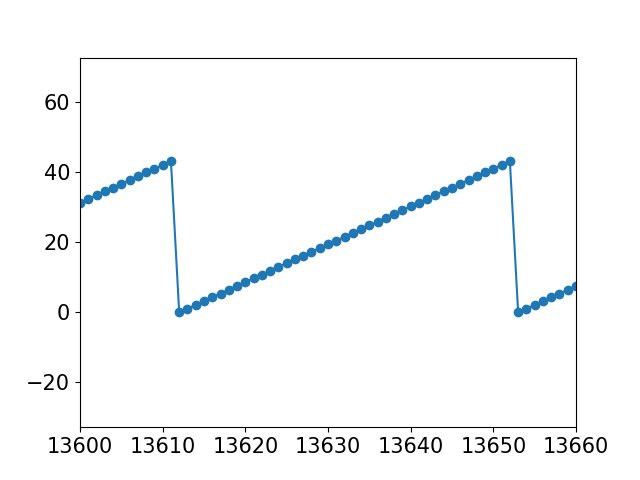

In [20]:
plt.figure()
plt.plot(z_coordinates-np.min(z_coordinates[13600:13660]), '-o')
plt.xlim(13600, 13660)
plt.show()

dict_keys(['height', 'width', 'date', 'fields_of_view', 'frames', 'z_levels', 'z_coordinates', 'total_images_per_channel', 'channels', 'pixel_microns', 'num_frames', 'experiment', 'events'])
(49200,)


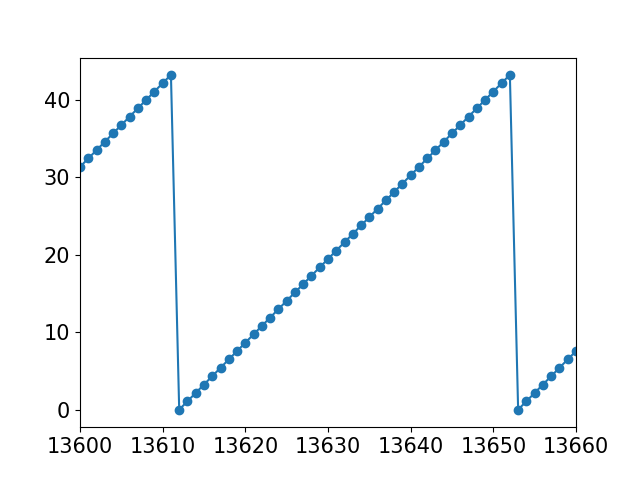

In [21]:
INPUT_ND2_PTH = r'D:\DATA\g5ht-free\20251028\date-20251028_time-1500_strain-ISg5HT_condition-starvedpatch_worm001.nd2'

STACK_LENGTH = 41
num_frames, height, width, num_channels = utils.get_range_from_nd2(INPUT_ND2_PTH, stack_length=STACK_LENGTH) 

# print all keys of nd2 file
with ND2Reader(INPUT_ND2_PTH) as f:
    print(f.metadata.keys())
    z_coordinates = np.array(f.metadata['z_coordinates'])#.reshape(STACK_LENGTH, -1)
    print(z_coordinates.shape)

plt.figure()
plt.plot(z_coordinates-np.min(z_coordinates[13600:13660]), '-o')
plt.xlim(13600, 13660)
plt.show()